# STOCK MARKET ANALYSIS USING DEEP LEARNING like Tensorflow


**Predicting** stock prices is an uncertain task which is modelled using machine learning to predict the return on stocks. There are a lot of methods and tools used for the purpose of stock market prediction. The stock market is considered to be very dynamic and complex in nature. An accurate prediction of future prices may lead to a higher yield of profit for investors through stock investments. As per the predictions, investors will be able to pick the stocks that may give a higher return.

Over the years, various machine learning techniques have been used in stock market prediction, but with the increased amount of data and expectation of more accurate prediction, the deep learning models are being used nowadays which have proven their advantage over traditional machine learning methods in terms of accuracy and speed of prediction. In this article, we will discuss the Long-Short-Term Memory (LSTM) Recurrent Neural Network, one of the popular deep learning models, used in stock market prediction. In this task, we will fetch the historical data of stock automatically using python libraries and fit the LSTM model on this data to predict the future prices of the stock.



## LSTM Recurrent Neural Network
Long-Short-Term Memory Recurrent Neural Network belongs to the family of deep learning algorithms. It is a recurrent network because of the feedback connections in its architecture. It has an advantage over traditional neural networks due to its capability to process the entire sequence of data. Its architecture comprises the cell, input gate, output gate and forget gate.


The cell remembers values over arbitrary time intervals, and the three gates regulate the flow of information into and out of the cell. The cell of the model is responsible for keeping track of the dependencies between the elements in the input sequence. The input gate controls the extent to which a new value flows into the cell, the forget gate controls the extent to which a value remains in the cell, and the output gate controls the extent to which the value in the cell is used to compute the output activation of the LSTM unit.



However, there are some variants of the LSTM model such as Gated Recurrent Units (GRUs) that do not have the output gate. LSTM Networks are popularly used on time-series data for classification, processing, and making predictions. The reason for its popularity in time-series application is that there can be several lags of unknown duration between important events in a time series.



1. Import the required libraries



In [1]:
from nsepy import get_history as gh

import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


2. We will fetch 6 years of historical prices of SBIN from 01.01.2013 to 31.12.2018. So we need to set the start and end dates and pass these parameters to the function for fetching the data.



In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)


3. We can visualise the fetched data in the above step. For simplicity, only the day-wise closing prices are visualised.



C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


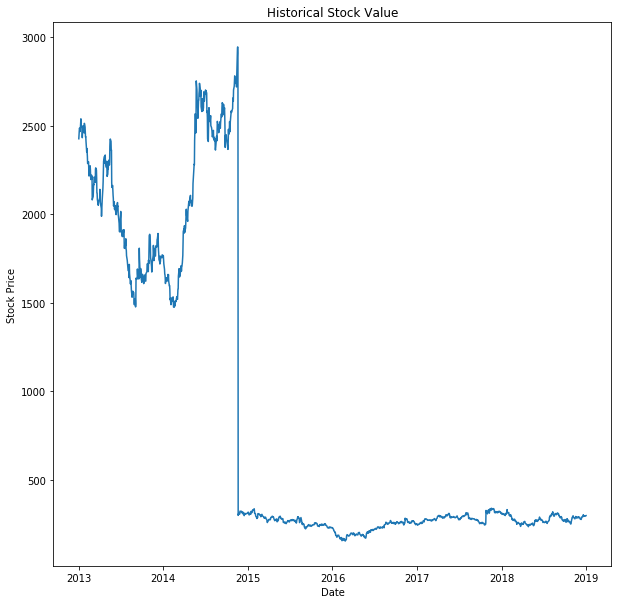

In [3]:
plt.figure(figsize=(10,10))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


4. There are 12 columns in the fetched data. Many of the columns are not of our interest so only significant columns are selected to create the main dataset.



In [ ]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']


5. Preprocess the data in order to prepare it for the LSTM model. The data fetched in step one is used for training purpose only. For testing purpose, different data will be fetched later.



In [ ]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


6. Define the LSTM Recurrent Neural Network. 



In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


Instructions for updating:
Colocations handled automatically by placer.


7. Compile and train the model defined in the above step. Iteratively, you can increase or decrease the epochs and batch size to get more accuracy.



In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1422/1422 [==============================] - 11s 8ms/step - loss: 0.0196
Epoch 2/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0085
Epoch 3/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0071
Epoch 4/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0063
Epoch 5/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0068
Epoch 6/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0062
Epoch 7/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0048
Epoch 8/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0055
Epoch 9/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0048
Epoch 10/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0042
Epoch 11/15
1422/1422 [==============================] - 9s 6ms/step - loss: 0.0046
Epoch 12/15
1422/1422 [=============

8. Now, our model is trained and needs to be tested on the testing data. For this purpose, fetch the new data for a different period. Preprocessing steps are similar as we have done with training data.



In [ ]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


9. Test the LSTM model on the new dataset.



In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


10. Visualize the predicted stock prices with original stock prices.



In [ ]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()